# Logistic Regression

Logistic Regression is a statistical method used for binary classification problems, where the outcome variable is categorical with two possible outcomes (0 or 1, true or false, yes or no). Unlike linear regression, which predicts continuous values, logistic regression predicts the probability that a given input point belongs to a certain class.

1. Binary Logistic Regression (Binomial Logistic Regression)
Definition: Binary logistic regression is used when the target variable has two possible classes or outcomes (e.g., 0 or 1, True or False, Yes or No). This is the most common form of logistic regression.
Example: Predicting whether a customer will buy insurance (1 = Yes, 0 = No).

2. Multinomial Logistic Regression
Definition: Multinomial logistic regression is used when the target variable has more than two classes (but the classes are unordered). It is a generalization of binary logistic regression for multi-class classification problems.
Example: Predicting the type of fruit (Apple, Banana, Orange) based on its features like weight, color, etc.

#  Binary Logistic regression - Insurance Data

### Import Libraries

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

### Load dataset

In [156]:
data=pd.read_csv('data/insurance_data.csv')
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


### Data preprocessing

In [158]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
dtype: bool

In [159]:
data.isna().sum()

age                 0
bought_insurance    0
dtype: int64

In [160]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [161]:
data.dtypes

age                 int64
bought_insurance    int64
dtype: object

In [162]:
data.shape

(26, 2)

In [163]:
data.size

52

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               26 non-null     int64
 1   bought_insurance  26 non-null     int64
dtypes: int64(2)
memory usage: 624.0 bytes


### Correlation Analysis


Correlation Matrix:


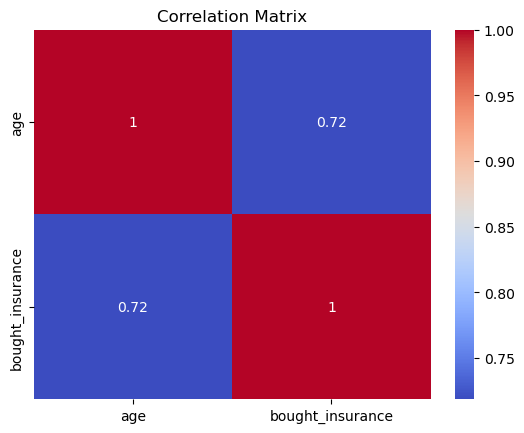

In [166]:
print("\nCorrelation Matrix:")
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Data Visualization

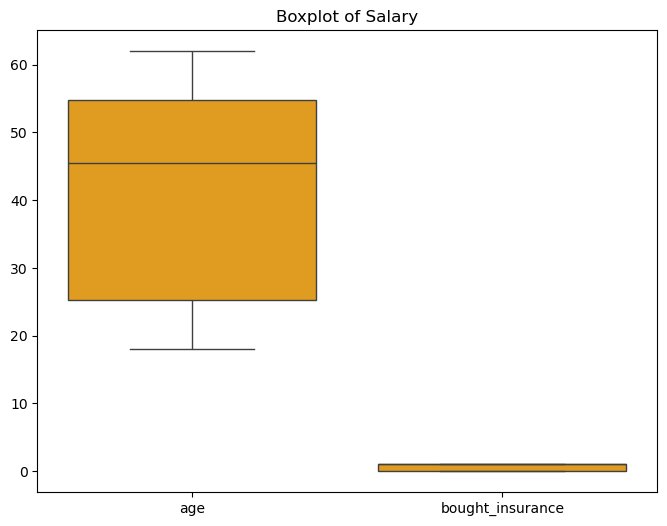

In [168]:
plt.figure(figsize=(8, 6))
sns.boxplot(data, color='orange')
plt.title("Boxplot of Salary")
plt.show()

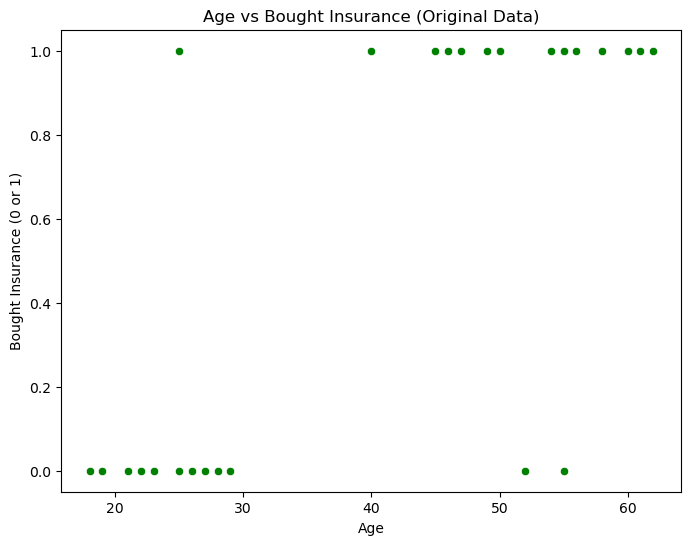

In [169]:
# Scatter plot for Age vs Bought Insurance (Original Data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bought_insurance', data=data, color="green")
plt.xlabel("Age")
plt.ylabel("Bought Insurance (0 or 1)")
plt.title("Age vs Bought Insurance (Original Data)")
plt.show()

### Splitting the Data into Features (X) and Target (Y)

In [171]:
X = data[['age']]  # Features
y = data['bought_insurance']  # Target

### Splitting the data into Training and Testing Sets

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression Model

In [175]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Predictions

In [177]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1], dtype=int64)

### Model Evaluation

In [227]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 83.33333333333334%


In [223]:
# Classification Report
cr = classification_report(y_test, y_pred)
print(f"Classification Report:\n{cr}")

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



In [217]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[2 0]
 [1 3]]


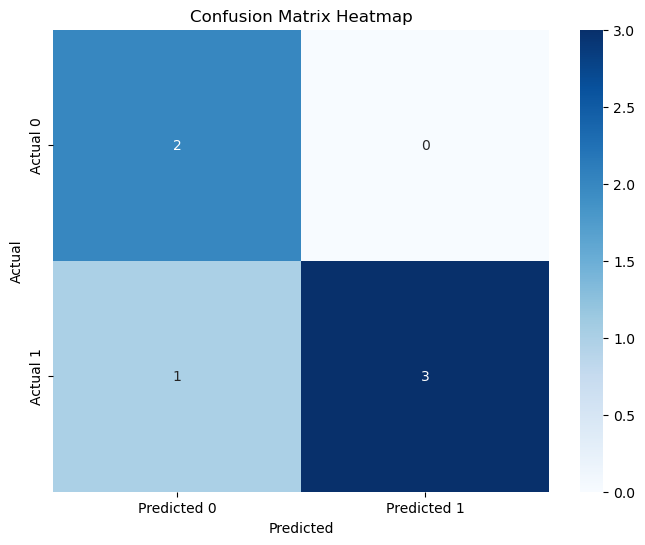

In [180]:
#Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

### Visualization of Actual vs Predicted Values

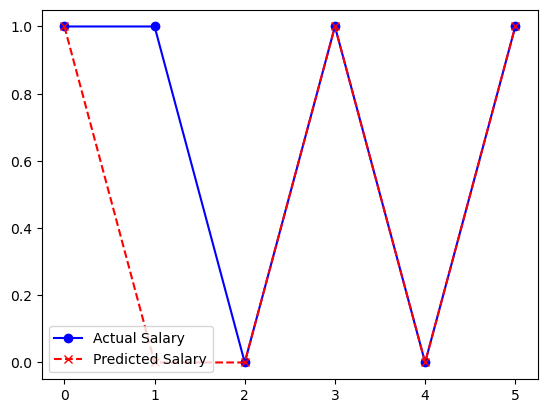

In [184]:
# Plotting actual values (y_test) with a line (blue)
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Salary', linestyle='-', marker='o')

# Plotting predicted values (y_pred) with a line (red)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Salary', linestyle='--', marker='x')
plt.legend()

### Creating DataFrame to View Results

In [186]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nResults DataFrame:")
print(results_df.head())


Results DataFrame:
    Actual  Predicted
8        1          1
16       1          0
0        0          0
25       1          1
11       0          0


In [189]:
#END